# MEPS Cancer Analysis (2019)
This project explores differences between individuals **with and without cancer**, as well as **across different types of cancer**, using data from the Medical Expenditure Panel Survey (MEPS).

The analysis focuses on how these groups differ in terms of:

1. **Sociodemographic characteristics** (e.g., age, sex, income, race/ethnicity, education)
1. **Quality of life**
1. **Mental health** (e.g., psychological distress, depression scores)
1. **Healthcare burden** (e.g., medical expenditures, missed work)
1. **Access to care** (e.g., insurance coverage, ability to get treatment)

All analyses are descriptive and exploratory, aiming to highlight potential disparities and patterns among cancer patients.

# Data Loading & Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
from pltstat import twofeats as tf
from pltstat import singlefeat as sf

In [2]:
# Settings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [3]:
# Data loading
df = pd.read_stata("data/h216.dta")
df.shape

(28512, 1447)

In [4]:
df.head()

DUID  PID    DUPERSID        PANEL FAMID31 FAMID42 FAMID53 FAMID19  \
0  2320002  101  2320002101  23 PANEL 23       B       B       B       B   
1  2320002  102  2320002102  23 PANEL 23       A       A       A       A   
2  2320002  103  2320002103  23 PANEL 23       A       A       A       A   
3  2320005  101  2320005101  23 PANEL 23       A       A       A       A   
4  2320005  102  2320005102  23 PANEL 23       A       A       A       A   

  FAMIDYR CPSFAMID             FCSZ1231                  FCRP1231 RULETR31  \
0       B        B  1 NUMBER OF PERSONS        1 REFERENCE PERSON        B   
1       A        A  2 NUMBER OF PERSONS        1 REFERENCE PERSON        A   
2       A        A  2 NUMBER OF PERSONS  0 NOT A REFERENCE PERSON        A   
3       A        A  2 NUMBER OF PERSONS        1 REFERENCE PERSON        A   
4       A        A  2 NUMBER OF PERSONS  0 NOT A REFERENCE PERSON        A   

  RULETR42 RULETR53 RULETR19         RUSIZE31         RUSIZE42  \
0        B        B        B   1 PERSON IN RU   1 PERSON IN RU   
1        A        A        A  2 PERSONS IN RU  2 PERSONS IN RU   
2        A        A        A  2 PERSONS IN RU  2 PERSONS IN RU   
3        A        A        A  2 PERSONS IN RU  2 PERSONS IN RU   
4        A        A        A  2 PERSONS IN RU  2 PERSONS IN RU   

          RUSIZE53         RUSIZE19       RUCLAS31       RUCLAS42  \
0   1 PERSON IN RU   1 PERSON IN RU  1 STANDARD RU  1 STANDARD RU   
1  2 PERSONS IN RU  2 PERSONS IN RU  1 STANDARD RU  1 STANDARD RU   
2  2 PERSONS IN RU  2 PERSONS IN RU  1 STANDARD RU  1 STANDARD RU   
3  2 PERSONS IN RU  2 PERSONS IN RU  1 STANDARD RU  1 STANDARD RU   
4  2 PERSONS IN RU  2 PERSONS IN RU  1 STANDARD RU  1 STANDARD RU   

        RUCLAS53       RUCLAS19   FAMSZE31   FAMSZE42   FAMSZE53   FAMSZE19  \
0  1 STANDARD RU  1 STANDARD RU   1 PERSON   1 PERSON   1 PERSON   1 PERSON   
1  1 STANDARD RU  1 STANDARD RU  2 PERSONS  2 PERSONS  2 PERSONS  2 PERSONS   
2  1 STANDARD RU  1 STANDARD RU  2 PERSONS  2 PERSONS  2 PERSONS  2 PERSONS   
3  1 STANDARD RU  1 STANDARD RU  2 PERSONS  2 PERSONS  2 PERSONS  2 PERSONS   
4  1 STANDARD RU  1 STANDARD RU  2 PERSONS  2 PERSONS  2 PERSONS  2 PERSONS   

                    FMRS1231   FAMS1231   FAMSZEYR                  FAMRFPYR  \
0  1 RESPONDING 12/31 FAMILY   1 PERSON   1 PERSON        1 REFERENCE PERSON   
1  1 RESPONDING 12/31 FAMILY  2 PERSONS  2 PERSONS        1 REFERENCE PERSON   
2  1 RESPONDING 12/31 FAMILY  2 PERSONS  2 PERSONS  0 NOT A REFERENCE PERSON   
3  1 RESPONDING 12/31 FAMILY  2 PERSONS  2 PERSONS        1 REFERENCE PERSON   
4  1 RESPONDING 12/31 FAMILY  2 PERSONS  2 PERSONS  0 NOT A REFERENCE PERSON   

      REGION31     REGION42     REGION53     REGION19  REFPRS31  REFPRS42  \
0    2 MIDWEST    2 MIDWEST    2 MIDWEST    2 MIDWEST       101       101   
1    2 MIDWEST    2 MIDWEST    2 MIDWEST    2 MIDWEST       102       102   
2    2 MIDWEST    2 MIDWEST    2 MIDWEST    2 MIDWEST       102       102   
3  1 NORTHEAST  1 NORTHEAST  1 NORTHEAST  1 NORTHEAST       101       101   
4  1 NORTHEAST  1 NORTHEAST  1 NORTHEAST  1 NORTHEAST       101       101   

   REFPRS53  REFPRS19                      RESP31                      RESP42  \
0       101       101     1 YES, FIRST RESPONDENT     1 YES, FIRST RESPONDENT   
1       102       102     1 YES, FIRST RESPONDENT     1 YES, FIRST RESPONDENT   
2       102       102  2 NO, NOT FIRST RESPONDENT  2 NO, NOT FIRST RESPONDENT   
3       101       101     1 YES, FIRST RESPONDENT     1 YES, FIRST RESPONDENT   
4       101       101  2 NO, NOT FIRST RESPONDENT  2 NO, NOT FIRST RESPONDENT   

                       RESP53                      RESP19  \
0     1 YES, FIRST RESPONDENT     1 YES, FIRST RESPONDENT   
1     1 YES, FIRST RESPONDENT     1 YES, FIRST RESPONDENT   
2  2 NO, NOT FIRST RESPONDENT  2 NO, NOT FIRST RESPONDENT   
3     1 YES, FIRST RESPONDENT     1 YES, FIRST RESPONDENT   
4  2 NO, NOT FIRST RESPONDENT  2 NO, NOT FIRST RESPONDENT

# Cancer Types & Distribution

In this section, we will explore the cancer types present in the dataset and analyze their distribution. 

The key features related to cancer in the dataset are:

1. **Cancer diagnosis (`CANCERDX`)**: The main feature indicating whether the individual has been diagnosed with cancer.
1. **Cancer Types (`cancer_types`)**: A list of specific cancer types present in the data:
 Feature | Description
--|--
**CANCERDX** | **CANCER DIAGNOSIS (>17)**
CABLADDR | CANCER DIAGNOSED - **BLADDER** (>17)
CABREAST | CANCER DIAGNOSED - **BREAST** (>17)
CACERVIX | CANCER DIAGNOSED - **CERVICAL** (>17)
CACOLON | CANCER DIAGNOSED - **COLON** (>17)
CALUNG | CANCER DIAGNOSED - **LUNG** (>17)
CALYMPH | CANCER DIAGNOSED - **LYMPHOMA (NONHODGKIN'S)** (>17)
CAMELANO | CANCER DIAGNOSED - **SKIN MELANOMA** (>17)
CAOTHER | CANCER DIAGNOSED - **OTHER** (>17)
CAPROSTA | CANCER DIAGNOSED - **PROSTATE** (>17)
CASKINNM | CANCER DIAGNOSED - **SKIN-NONMELANO** (>17)
CASKINDK | CANCER DIAGNOSED - **SKIN-UNKNOWN TYPE** (>17)
CAUTERUS | CANCER DIAGNOSED - **UTERINE** (>17) 

We will analyze the distribution of these cancer types and investigate how they are represented in the dataset.

In [5]:
cancer_feat = 'CANCERDX'
cancer_types = ['CABLADDR', 'CABREAST', 'CACERVIX', 'CACOLON', 'CALUNG', 'CALYMPH', 'CAMELANO', 'CAOTHER', 'CAPROSTA', 'CASKINNM', 'CASKINDK', 'CAUTERUS']

In [6]:
# cancer_type_names = ['BLADDER', 'BREAST', 'CERVICAL', 'COLON', 'LUNG', 'LYMPHOMA', 'SKIN MELANOMA', 'OTHER', 'PROSTATE', 'SKIN-NONMELANO', 'SKIN-UNKNOWN TYPE', 'UTERINE']
cancer_type_names = ['Bladder', 'Breast', 'Cervical', 'Colon', 'Lung', 'Lymphoma', 'Skin Melanoma', 'Other', 'Prostate', 'Skin Non-melanoma', 'Skin Unknown type', 'Uterine']
# cancer_type_names = ['BLADDER', 'BREAST', 'CERVICAL', 'COLON', 'LUNG', 'LYMPHOMA', 'SKIN', 'OTHER', 'PROSTATE', 'SKIN', 'SKIN', 'UTERINE']

**1. Cancer Diagnosis**

In [7]:
df[cancer_feat].head()

0               2 NO
1               2 NO
2    -1 INAPPLICABLE
3               2 NO
4               2 NO
Name: CANCERDX, dtype: category
Categories (6, object): ['-15 CANNOT BE COMPUTED' < '-8 DK' < '-7 REFUSED' < '-1 INAPPLICABLE' < '1 YES' < '2 NO']

In [8]:
df[cancer_feat].value_counts()

CANCERDX
2 NO                      19088
-1 INAPPLICABLE            6669
1 YES                      2617
-15 CANNOT BE COMPUTED      111
-7 REFUSED                   17
-8 DK                        10
Name: count, dtype: int64

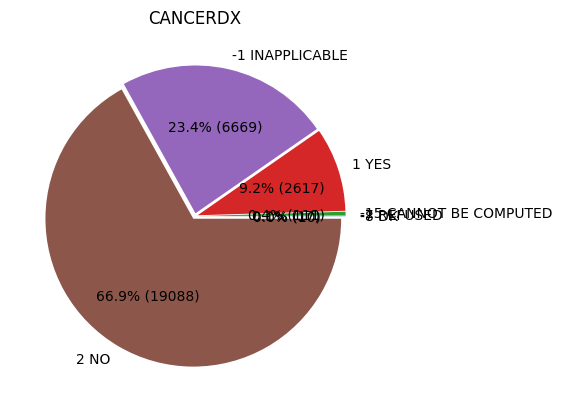

In [9]:
sf.pie(df['CANCERDX'])

In [10]:
df[cancer_feat].value_counts()

CANCERDX
2 NO                      19088
-1 INAPPLICABLE            6669
1 YES                      2617
-15 CANNOT BE COMPUTED      111
-7 REFUSED                   17
-8 DK                        10
Name: count, dtype: int64

**Data cleaning**

Change **categorical** columns to object **type**

In [11]:
df_cat = df.select_dtypes('category')
df[df_cat.columns] = df_cat.astype('object')
del df_cat

We **drop patients** with invalid or inapplicable responses in cancer-related variables. Specifically, we remove the following values:

- `-1 INAPPLICABLE` – e.g., patients under 18 years old  
- `-15 CANNOT BE COMPUTED`  
- `-8 DK (Don't know)`  
- `-7 REFUSED`

Patients under 18 years old are not included in the analysis.  
The last three categories represent very small subgroups and are not relevant for the analysis. These entries do not provide reliable information and are therefore excluded.

In [12]:
vals_to_drop = ['-1 INAPPLICABLE', '-15 CANNOT BE COMPUTED', '-8 DK', '-7 REFUSED']

In [13]:
df = df.loc[~df[cancer_feat].isin(vals_to_drop), :]

In [14]:
no_ans = '2. No'
yes_ans = '1. Yes'
df[cancer_feat] = df[cancer_feat].replace({'1 YES': yes_ans, '2 NO': no_ans})

In [15]:
# df[cancer_feat].cat.remove_unused_categories()
df[cancer_feat].value_counts()

CANCERDX
2. No     19088
1. Yes     2617
Name: count, dtype: int64

**2. Cancer Types**

In [16]:
cancer_bool_types = [f'{col}_bool' for col in cancer_types]
df[cancer_bool_types] = df.loc[:, cancer_types] == '1 YES'

**Number of cancer types per patient (`'CANCERDX_mult'` feature):**

In [17]:
df[cancer_bool_types].sum(axis=1).value_counts()

0    19098
1     2455
2      129
3       21
4        2
Name: count, dtype: int64

In [18]:
cancer_mult = 'CANCERDX_mult'
df[cancer_mult] = df.loc[:, cancer_bool_types].sum(axis=1)
df[cancer_mult].value_counts()

CANCERDX_mult
0    19098
1     2455
2      129
3       21
4        2
Name: count, dtype: int64

We create a **new feature** (`CANCERDX_type`) that indicates the specific type of cancer a patient has (if any).  
- If the patient has **no** cancer, the value is `"2. No"`  
- If the patient has **exactly one type** of cancer, the value reflects that type `1. Type`  
- If the patient has **multiple cancer types**, the value is `"0. Multiple"`  

This helps to simplify the representation of cancer diagnosis for each individual.

In [19]:
mult_ans = '0. Multiple'

In [20]:
cancer_feat_type = 'CANCERDX_type'
df[cancer_feat_type] = df.loc[:, cancer_feat]

for bool_type, type_name in zip(cancer_bool_types, cancer_type_names):
    df.loc[df[bool_type], cancer_feat_type] = f'1. {type_name}'

df.loc[df.loc[:, cancer_mult] > 1, cancer_feat_type] = mult_ans

df[cancer_feat_type] = df[cancer_feat_type].replace({'2 NO': no_ans})

In [21]:
df[cancer_feat_type].value_counts().sort_index()

CANCERDX_type
0. Multiple               152
1. Bladder                 42
1. Breast                 370
1. Cervical               127
1. Colon                  105
1. Lung                    53
1. Lymphoma                57
1. Other                  463
1. Prostate               286
1. Skin Melanoma          252
1. Skin Non-melanoma      475
1. Skin Unknown type      157
1. Uterine                 68
1. Yes                     10
2. No                   19088
Name: count, dtype: int64

10 patients answered "Yes" to having cancer (`CANCERDX = '1. Yes'`), but none of the specific cancer type flags were marked. Please check these cases:

In [22]:
df.loc[df[cancer_feat_type]==yes_ans, cancer_types]

,CABLADDR,CABREAST,CACERVIX,CACOLON,CALUNG,CALYMPH,CAMELANO,CAOTHER,CAPROSTA,CASKINNM,CASKINDK,CAUTERUS
7171,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK
14888,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE
15510,-7 REFUSED,-7 REFUSED,-1 INAPPLICABLE,-7 REFUSED,-7 REFUSED,-7 REFUSED,-7 REFUSED,-7 REFUSED,-7 REFUSED,-7 REFUSED,-7 REFUSED,-1 INAPPLICABLE
15517,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE
19263,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE
19366,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE
22915,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK
24315,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK
26533,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK
27241,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-8 DK,-1 INAPPLICABLE,-8 DK,-8 DK,-8 DK


Based on this inconsistency, we assign them a new category:

- `'1. DK / Refused'` — indicating that the patient confirmed a cancer diagnosis, but did not specify the type (possibly due to "Don't know" or "Refused" answers).

This allows us to retain these records without misclassifying their cancer status.

In [23]:
df[cancer_feat_type] = df[cancer_feat_type].replace({'1 YES': '1. DK / Refused'})

**Finally, let's review the final features:** 
* Cancer diagnosis (`CANCERDX`)
* Cancer type (`CANCERDX_type`).

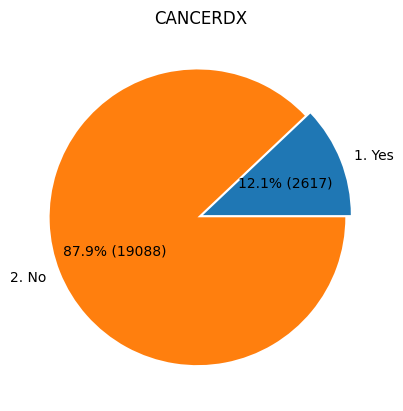

In [24]:
sf.pie(df[cancer_feat])

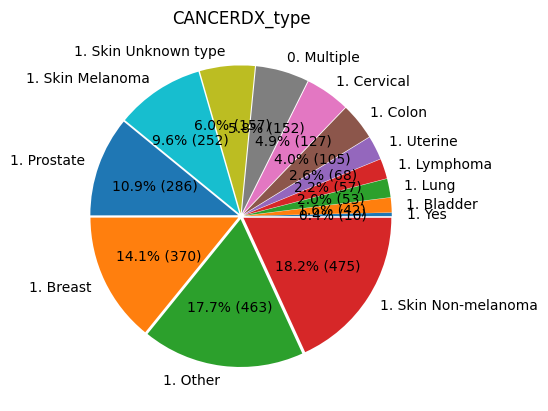

In [25]:
sf.pie(df.loc[df[cancer_feat_type]!=no_ans, cancer_feat_type])

* and 19088 patients who responded **No**:

In [26]:
df[cancer_feat_type].value_counts().sort_index()

CANCERDX_type
0. Multiple               152
1. Bladder                 42
1. Breast                 370
1. Cervical               127
1. Colon                  105
1. Lung                    53
1. Lymphoma                57
1. Other                  463
1. Prostate               286
1. Skin Melanoma          252
1. Skin Non-melanoma      475
1. Skin Unknown type      157
1. Uterine                 68
1. Yes                     10
2. No                   19088
Name: count, dtype: int64

In [27]:
df.groupby(cancer_feat)['AGELAST'].describe()

,count,mean,std,min,25%,50%,75%,max
CANCERDX,,,,,,,,
1. Yes,2617.0,66.625908,13.713160,19.0,59.0,69.0,77.0,85.0
2. No,19088.0,47.750681,17.947798,17.0,33.0,47.0,62.0,85.0


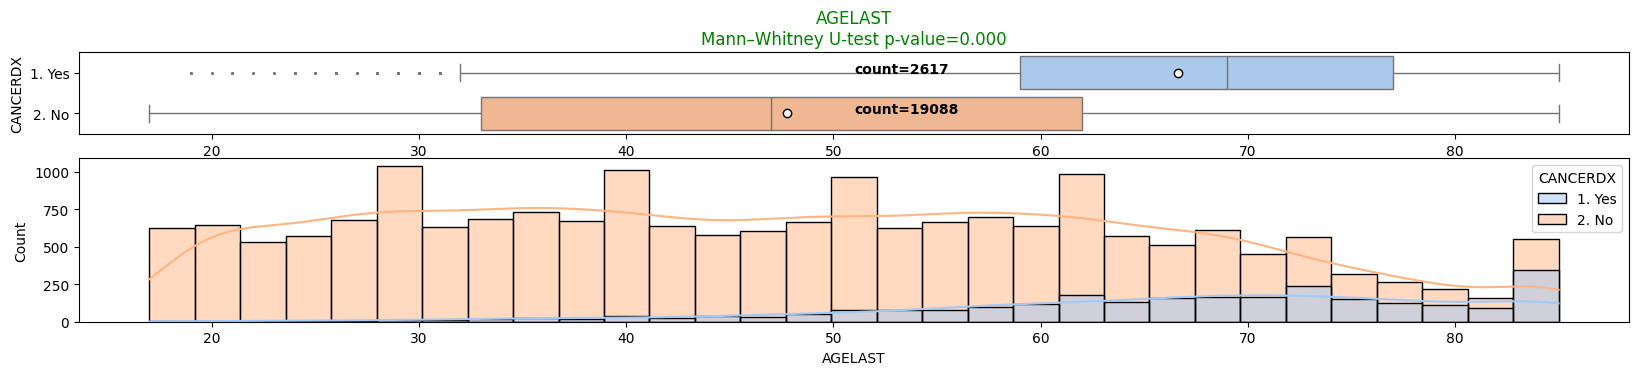

In [28]:
tf.dis_box_plot(df, cancer_feat, 'AGELAST')

In [29]:
df.groupby(cancer_feat_type)['AGELAST'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
CANCERDX_type,,,,,,,,
0. Multiple,152.0,74.0,10.0,45.0,68.0,75.0,82.0,85.0
1. Bladder,42.0,70.0,15.0,25.0,65.0,72.0,83.0,85.0
1. Breast,370.0,68.0,12.0,22.0,61.0,69.0,77.0,85.0
1. Cervical,127.0,53.0,16.0,26.0,40.0,52.0,62.0,85.0
1. Colon,105.0,69.0,12.0,36.0,64.0,69.0,78.0,85.0
1. Lung,53.0,69.0,11.0,44.0,61.0,72.0,77.0,85.0
1. Lymphoma,57.0,61.0,16.0,26.0,49.0,63.0,71.0,85.0
1. Other,463.0,61.0,16.0,19.0,52.0,63.0,72.0,85.0
1. Prostate,286.0,73.0,8.0,43.0,67.0,73.0,79.0,85.0


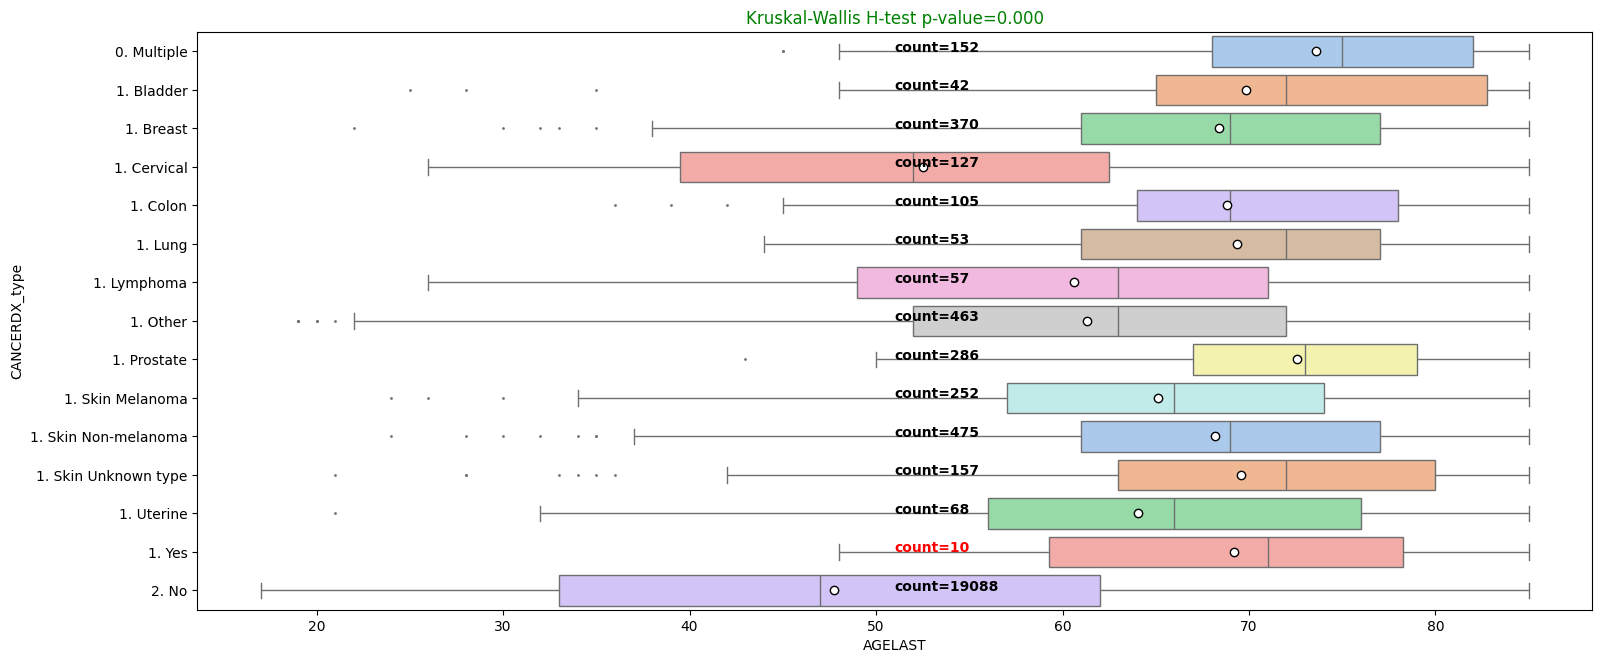

In [30]:
tf.boxplot(df, cancer_feat_type, 'AGELAST')

**Key Observations on Patient Age by Cancer Type**  

1. **Average Age**:  
   - Patients **without cancer ("No")** are the youngest group, with a mean age of **48 years**.  
   - Cancer patients are significantly older on average. Notable examples:  
     - **"Multiple" cancers**: Oldest group (**74 years**).  
     - **Prostate cancer**: **73 years**.  
     - **Bladder cancer**: **70 years**.  
     - **Cervical cancer**: Youngest cancer group (**53 years**).  

2. **Age Variability (Standard Deviation)**:  
   - Highest variability in **"Cervical" (std=16)**, **"Lymphoma" (16)**, **"Other" (16)**, and **"Uterine" (15)**, indicating a wide age range.  
   - Lowest variability in **"Prostate" (std=8)** and **"Multiple" (10)**, suggesting a more concentrated age distribution.  

3. **Min/Max Age**:  
   - **Maximum age** is consistently **85 years** across all groups.  
   - **Minimum age** varies:  
     - Youngest patients: **"Other" cancers (19)**, **"Uterine" (21)**, and **"Cervical" (26)**.  
     - Oldest minimum age: **"Multiple" cancers (45)**.  

4. **Median Age (50th Percentile)**:  
   - Confirms trends in mean age:  
     - **Prostate**: **73 years**.  
     - **Cervical**: **52 years**.  
     - **No cancer**: **47 years**.  

5. **Group-Specific Insights**:  
   - **Cervical cancer**: Youngest cohort, aligning with epidemiology (often affects younger women).  
   - **Prostate/Multiple cancers**: Oldest groups, expected due to age-related risk.  
   - **No cancer**: Much younger, reflecting lower risk in younger populations.  

6. **Potential Outliers**:  
   - Unusually young patients in **"Bladder" (25)**, **"Breast" (22)**, and **"Other" (19)** may indicate rare early-onset cases or data noise.  

### **Conclusion**:  
Age distribution varies markedly by cancer type. Most cancers skew older (especially prostate and multiple cancers), while cervical cancer is an exception. Non-cancer patients are significantly younger, underscoring the link between aging and cancer risk. High variability in some groups (e.g., cervical, lymphoma) suggests diverse at-risk populations.  

**Age Distribution vs. Expected Epidemiology by Cancer Type**

#### **1. Expected Patterns (Matches Epidemiology)**
- **Prostate Cancer (Mean: 73)**:  
  - **Epidemiology**: Peak incidence at **65+ years**, median age at diagnosis ~66.  
  - **Data Match**: Oldest male-dominated cancer in our data (median 73), aligning perfectly with known late-onset risk.

- **Cervical Cancer (Mean: 53)**:  
  - **Epidemiology**: Most common in **30–50-year-olds** (median ~49).  
  - **Data Match**: Youngest cancer group here (median 52), consistent with HPV-associated early-onset trends.

- **Lung Cancer (Mean: 69)**:  
  - **Epidemiology**: Median age ~70, strongly tied to aging/smoking.  
  - **Data Match**: Matches expected (median 72), with narrow range (44–85).

- **Colon Cancer (Mean: 69)**:  
  - **Epidemiology**: Typical onset **65+**, but rising in younger adults.  
  - **Data Match**: Median 69 fits norms, though min age (36) hints at early-onset cases.

- **Breast Cancer (Mean: 68)**:  
  - **Epidemiology**: Bimodal (peaks ~50s and 70s); median ~62.  
  - **Data Match**: Slightly older here (median 69), possibly due to screening biases or late diagnoses.

#### **2. Deviations from Expectations**
- **Bladder Cancer (Mean: 70)**:  
  - **Epidemiology**: Typically **70+**, but data shows a **young outlier (min=25)**.  
  - **Possible Explanation**: Rare aggressive subtypes (e.g., in smokers <40) or misclassification.

- **Lymphoma (Mean: 61)**:  
  - **Epidemiology**: Broad range (20s–80s); Hodgkin’s peaks young (~30s), Non-Hodgkin’s older (~65).  
  - **Data Gap**: Unclear subtype split; median 63 suggests mix, but high std (16) implies heterogeneity.

- **Uterine Cancer (Mean: 64)**:  
  - **Epidemiology**: Two types:  
    - Endometrial (postmenopausal, ~60s).  
    - Sarcomas (younger, ~40s).  
  - **Data Note**: Median 66 aligns with endometrial dominance, but min=21 suggests rare cases.

- **Melanoma (Mean: 65)**:  
  - **Epidemiology**: Common in **50+**, but rising in <40 due to UV exposure.  
  - **Data Note**: Median 66 fits, but min=24 highlights younger risk groups.

#### **3. Notable Outliers**
- **"Other" Cancers (Min=19)**:  
  - Likely includes rare/aggressive cancers (e.g., pediatric sarcomas, leukemias), pulling age down.  
- **"Multiple" Cancers (Min=45)**:  
  - Reflects accumulation of age-related mutations (expected in elderly), but no very young cases.

#### **4. Non-Cancer Group ("No")**  
- **Mean 48**: Much younger, as expected (cancer risk rises exponentially with age).  
- **Wide Range (17–85)**: Captures general population heterogeneity.

---

### **Epidemiological Takeaways**
- **Strong Alignment**: Prostate, cervical, lung, and colon cancers match known age patterns.  
- **Red Flags**:  
  - Young bladder/uterine cases warrant scrutiny (data errors or rare subtypes?).  
  - Lymphoma’s broad range suggests unclassified subtypes.  
- **Screening Implications**:  
  - Breast cancer’s older median may reflect under-screening in younger groups.  
  - Cervical cancer’s young peak reinforces need for early HPV vaccination/screening.  

### **Limitations**
- **Data Granularity**: Missing subtype details (e.g., Hodgkin’s vs. Non-Hodgkin’s lymphoma).  
- **Cultural/Screening Bias**: Older averages may reflect healthcare access patterns.  

### **Лимфома (неходжкинская) / Non-Hodgkin's Lymphoma (NHL) - Уточнённый анализ**  

#### **На русском**  
**Данные**:  
- Средний возраст: **61 год**  
- Стандартное отклонение: **16 лет** (высокий разброс)  
- Минимальный возраст: **26 лет**  
- Медиана: **63 года**  

**Сравнение с эпидемиологией**:  
- **Ожидаемое для НХЛ**:  
  - Типичный возраст: **55–75 лет** (пик после 60).  
  - Агрессивные подтипы (например, диффузная В-крупноклеточная) могут встречаться у молодых (30–40 лет).  
  - Медленно растущие (например, фолликулярная) — обычно у пожилых.  
- **Выводы**:  
  - Медиана (63) соответствует ожидаемому.  
  - Молодые пациенты (min=26) могут иметь агрессивные подтипы или иммунодефицитные состояния (например, ВИЧ-ассоциированные лимфомы).  
  - Высокий разброс (ст. отклонение 16) отражает разнообразие подтипов НХЛ.  

**Рекомендации**:  
- Требуется детализация по подтипам (например, выделить диффузные В-клеточные vs. фолликулярные).  
- Проверить наличие сопутствующих заболеваний у молодых пациентов.  

---

#### **In English**  
**Data**:  
- Mean age: **61 years**  
- Std deviation: **16 years** (high variability)  
- Min age: **26 years**  
- Median: **63 years**  

**Epidemiological Context for NHL**:  
- **Expected**:  
  - Typical onset: **55–75 years** (peak >60).  
  - Aggressive subtypes (e.g., diffuse large B-cell) can occur in younger adults (30–40s).  
  - Indolent types (e.g., follicular) are more common in the elderly.  
- **Conclusions**:  
  - Median (63) aligns with expectations.  
  - Young patients (min=26) may have aggressive subtypes or immunodeficiency (e.g., HIV-related NHL).  
  - High variability (std=16) reflects NHL’s subtype diversity.  

**Recommendations**:  
- Subtype stratification (e.g., DLBCL vs. follicular) is critical.  
- Screen young patients for immunosuppression or genetic risk factors.  

---

### **Ключевое отличие от лимфомы Ходжкина / Key Difference from Hodgkin’s Lymphoma**  
- **НХЛ**:  
  - Пик в **пожилом возрасте** (кроме агрессивных форм).  
  - Сильно зависит от иммунного статуса.  
- **Лимфома Ходжкина**:  
  - Два пика: **20–30 лет** и **55+ лет**.  
  - В данных не представлена (но если бы была, ожидался бы меньший средний возраст).  

Для точного анализа важно разделять эти типы! / Precise analysis requires subtype separation!  